<h2><p align="center"> Importação de bibliotecas e consulta a base de dados do banco central através de API</h2></p>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns; sns.set()

#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
   
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
selic_meta = consulta_bc(432)

<h3><p align="center"> Variavel que armazena a lista de valores da SELIC adquiridas na base de dados. </h3></p>

In [2]:
a = selic_meta['valor'].values.tolist()

<h2><p align="center"> Grafico da taxa SELIC ao passar dos anos </h2></p>

Text(0, 0.5, '%')

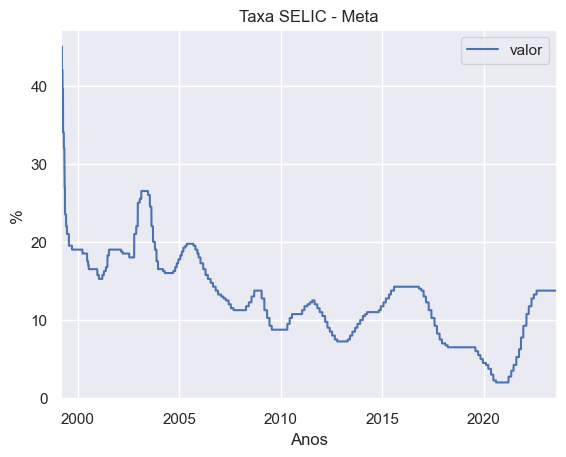

In [3]:
# Usar a biblioteca matplotlib para criar um espaçamento e intervalo definido entre os valores do grafico
selic_meta.plot()
plt.title("Taxa SELIC - Meta")
plt.xlabel("Anos")
plt.ylabel("%")

In [9]:
def aplicarValor():
    aporte = float(input("Insira o valor do aporte para ser calculado"))
    return aporte

aplicarValor()





float

In [6]:



Valoraplicado = float(input("Insira o valor do aporte para ser calculado"))
print(f'Este é o valor do aporte inserido: {Valoraplicado:.2f} reais')

x = (selic_meta['valor'].iloc[-1]) #Último valor da lista.
print(f'Este é o valor da taxa selic hoje: {x:.2f}% ao ano')
selicmes = x/12
print (f'Este seria o valor da taxa selic {selicmes:.4f}% ao mes')
selicdia = x/365
print (f'E este seria o valor da taxa selic {selicdia:.5f}% ao dia')

tempoaplicadoemdias = int(input("Insira o total de tempo em que o dinheiro ficou aplicado (em dias)"))
IR1=0.15/100
IR2=0.175/100
IR3=0.2/100
IR4=0.225/100
IOF=1

#Estrutura condicional que calcula o somatório do rendimento de acordo
#com o total de dias que o dinheiro ficou aplicado.


if ((tempoaplicadoemdias)<=180):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR1 * selicdia)
    
if ((tempoaplicadoemdias)>180 and (tempoaplicadoemdias)<=360):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR2 * selicdia)
    
if ((tempoaplicadoemdias)>360 and (tempoaplicadoemdias)<=720):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR3 * selicdia)
    
if ((tempoaplicadoemdias)>(720)):
    valorfinal = Valoraplicado + (Valoraplicado * tempoaplicadoemdias * IR4 * selicdia)

print(valorfinal)

print(Valoraplicado/valorfinal)


Este é o valor do aporte inserido: 1000.00 reais
Este é o valor da taxa selic hoje: 13.75% ao ano
Este seria o valor da taxa selic 1.1458% ao mes
E este seria o valor da taxa selic 0.03767% ao dia
1001.695205479452
0.9983076633788611


In [12]:
RendimentoMensal = aplicarValor()*(selicmes/100)
print (f'Este é o total após 30 dias: {RendimentoMensal:.1f}')

Este é o total após 30 dias: 3.4


In [14]:
ValorAcumuladoMensal = RendimentoMensal+aplicarValor()
print(ValorAcumuladoMensal)

303.4375


In [15]:
print("Este é o total após 1 dia")
RendimentoDiário = aplicarValor()*(selicaodia/100)
print(RendimentoDiário)

Este é o total após 1 dia


NameError: name 'aporte' is not defined